In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
import requests
import math
import re
import csv
import mplhep as hep

## Comparing Run 2 and Run 3 trigger rates: checking single- and double-objects seeds representative of each object type

#### Ephemeral HLTPhysics 2022 (Run D, 9 parts) - run 357688 (nBunches = 2400): 5150338 events (50 LS in LS = [35,84] for PU=52: 939081 events)
L1Ntuples ZBHLTPhysics2022: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run357688/
 
*NOTE* that files from part 7 and 8 are not available...

#### Ephemeral HLTPhysics 2018 (Run D, 8 parts) - run 325097 (nBunches = 2544): 626090 events (36 LS in LS = [58,93] for PU=52: 469101 events)                                                                                                                                                                        
L1Ntuples ZBHLTPhysics2018: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run325097/

In [2]:
# Countings and thresholds + Lists for rate computation
# MU #
mu_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26, 27]
n_SingleMu_CountingsRun2 =    [46348, 43566, 42052, 39303, 36742, 34523, 30116, 28259]
n_SingleMu_CountingsRun2_B =  [13732, 12889, 12234, 11387, 10393, 9547, 8908, 8161]
n_SingleMu_CountingsRun2_O =  [12788, 11772, 11661, 11474, 11356, 11214, 8625, 8519]
n_SingleMu_CountingsRun2_E =  [19322, 18392, 17643, 15970, 14565, 13367, 12211, 11240]
n_SingleMu_CountingsRun3 =    [110955, 108030, 104805, 97177, 87636, 81895, 77098, 71611]
n_SingleMu_CountingsRun3_B =  [23369, 22227, 21272, 19227, 17643, 16101, 14913, 13801]  
n_SingleMu_CountingsRun3_O =  [21773, 21569, 20632, 20209, 16770, 16478, 16268, 14989]
n_SingleMu_CountingsRun3_E =  [64215, 62641, 61301, 56248, 51825, 47995, 44678, 41647]
rate_muon_algo_Run2 = []
rate_muon_algo_Run3 = []
rate_muon_algo_Run2_B = []
rate_muon_algo_Run3_B = []
rate_muon_algo_Run2_O = []
rate_muon_algo_Run3_O = []
rate_muon_algo_Run2_E = []
rate_muon_algo_Run3_E = []

# EG #
eg_pt_thresholds =  [32, 33, 34, 35, 36, 37, 38, 39, 40]
n_SingleEG_CountingsRun2 =    [112899, 104374, 95531, 87057, 79504, 72904, 66818, 61126, 55919]
n_SingleEG_CountingsRun2_B =  [61481, 57438, 53255, 49580, 46371, 43149, 39937, 37165, 34855]
n_SingleEG_CountingsRun2_E =  [52237, 47687, 42978, 38129, 33738, 30325, 27430, 24486, 21577]
n_SingleEG_CountingsRun3 =    [194771, 178959, 164366, 149748, 135392, 124147, 113134, 103626, 94710]
n_SingleEG_CountingsRun3_B =  [127240, 117361, 107939, 98829, 89762, 83010, 75888, 69914, 64077]
n_SingleEG_CountingsRun3_E =  [69184, 63131, 57852, 52218, 46822, 42257, 38295, 34694, 31571]
rate_eg_algo_Run2 = []
rate_eg_algo_Run3 = []
rate_eg_algo_Run2_B = []
rate_eg_algo_Run3_B = []
rate_eg_algo_Run2_E = []
rate_eg_algo_Run3_E = []
doubleeg_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26]
n_DoubleLooseIsoEG_CountingsRun2 =    [2226, 2038, 1852, 1701, 1562, 1469, 1396]
n_DoubleLooseIsoEG_CountingsRun2_B =  [1030, 951, 878, 814, 767, 731, 709]
n_DoubleLooseIsoEG_CountingsRun2_E =  [1893, 1689, 1490, 1352, 1184, 1073, 981]
n_DoubleLooseIsoEG_CountingsRun3 =    [5735, 5190, 4741, 4376, 4081, 3808, 3574]
n_DoubleLooseIsoEG_CountingsRun3_B =  [3160, 2843, 2607, 2395, 2234, 2094, 1982]
n_DoubleLooseIsoEG_CountingsRun3_E =  [3193, 2908, 2614, 2425, 2249, 2089, 1942]
rate_doubleeg_algo_Run2 = []
rate_doubleeg_algo_Run3 = []
rate_doubleeg_algo_Run2_B = []
rate_doubleeg_algo_Run3_B = []
rate_doubleeg_algo_Run2_E = []
rate_doubleeg_algo_Run3_E = []

# TAU #
tau_pt_thresholds =  [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
n_SingleTau_CountingsRun2 =  [13388, 13066, 12768, 12484, 12206, 11927, 11688, 11418, 11180, 10923, 10716]
n_SingleTau_CountingsRun3 =  [19787, 19262, 18737, 18267, 17800, 17376, 16951, 16509, 16061, 15663, 15255]
rate_tau_algo_Run2 = []
rate_tau_algo_Run3 = []
doubleisotau_pt_thresholds =  [30, 31, 32, 33, 34, 35, 36]
n_DoubleIsoTau_CountingsRun2 =   [90452, 87392, 85213, 76311, 68096, 61889, 57153] 
n_DoubleIsoTau_CountingsRun3 =  [149721, 142400, 136772, 123673, 111707, 101340, 91308]
rate_doubleisotau_algo_Run2 = []
rate_doubleisotau_algo_Run3 = []

# JET #
jet_pt_thresholds =  [140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]
n_SingleJet_CountingsRun2 =    [34347, 30563, 27331, 24399, 22014, 19763, 17913, 16235, 14741, 13496, 12387, 11363, 10543]
n_SingleJet_CountingsRun2_B =  [26241, 23284, 20816, 18624, 16814, 15117, 13747, 12479, 11369, 10463, 9688, 8976, 8395]
n_SingleJet_CountingsRun2_E =  [11871, 10511, 9348, 8234, 7359, 6535, 5816, 5229, 4678, 4193, 3717, 3311, 2977]
n_SingleJet_CountingsRun2_F =  [4421, 3960, 3583, 3211, 2936, 2725, 2509, 2308, 2151, 1980, 1806, 1669, 1561]
n_SingleJet_CountingsRun3 =    [52195, 47258, 43067, 38616, 33654, 29718, 26635, 24070, 21957, 20029, 18306, 16879, 15401]
n_SingleJet_CountingsRun3_B =  [41995, 38343, 35102, 31360, 27100, 23868, 21468, 19545, 17913, 16424, 15101, 13990, 12775]
n_SingleJet_CountingsRun3_E =  [16351, 14276, 12738, 11403, 10089, 8930, 7891, 6918, 6190, 5531, 4955, 4470, 4025]
n_SingleJet_CountingsRun3_F =  [3166, 2623, 2347, 2154, 1894, 1730, 1599, 1528, 1462, 1388, 1337, 1285, 1245]
rate_jet_algo_Run2 = []
rate_jet_algo_Run3 = []
rate_jet_algo_Run2_B = []
rate_jet_algo_Run3_B = []
rate_jet_algo_Run2_E = []
rate_jet_algo_Run3_E = []
rate_jet_algo_Run2_F = []
rate_jet_algo_Run3_F = []

# MET #
met_thresholds =  [70, 72, 75, 78, 80, 85, 90, 95, 100]
n_ETMHF_CountingsRun2 =  [41538, 39049, 35721, 32979, 31302, 27780, 25044, 20903, 17962]
n_ETMHF_CountingsRun3 =  [36033, 34164, 31754, 29794, 28689, 21682, 17143, 13891, 11642]
rate_met_algo_Run2 = []
rate_met_algo_Run3 = []

In [3]:
# RATE COMPUTATION PER BX [Hz]
# 2018: N_countings * PS/n_Parts (HLTPhysics) / (23.2*n_LS*n_BX) = N_countings * 1100/8 (HLTPhysics) / (23.2*36*2544) 
# 2022: N_countings * PS (HLTPhysics) * 9/7(= tot/n parts used) / (23.2*n_LS*n_BX) = N_countings * 75 (HLTPhysics) / (23.2*50*2400)

for mu in range(len(mu_pt_thresholds)):
    rate_muon_algo_Run2.append(n_SingleMu_CountingsRun2[mu] * 1100/8 / (23.2*36*2544))
    rate_muon_algo_Run3.append(n_SingleMu_CountingsRun3[mu] * 75 * 9/7 / (23.2*50*2400))
    rate_muon_algo_Run2_B.append(n_SingleMu_CountingsRun2_B[mu] * 1100/8 / (23.2*36*2544))
    rate_muon_algo_Run3_B.append(n_SingleMu_CountingsRun3_B[mu] * 75 * 9/7 / (23.2*50*2400))
    rate_muon_algo_Run2_O.append(n_SingleMu_CountingsRun2_O[mu] * 1100/8 / (23.2*36*2544))
    rate_muon_algo_Run3_O.append(n_SingleMu_CountingsRun3_O[mu] * 75 * 9/7 / (23.2*50*2400))
    rate_muon_algo_Run2_E.append(n_SingleMu_CountingsRun2_E[mu] * 1100/8 / (23.2*36*2544))
    rate_muon_algo_Run3_E.append(n_SingleMu_CountingsRun3_E[mu] * 75 * 9/7 / (23.2*50*2400))
    
for eg in range(len(eg_pt_thresholds)):
    rate_eg_algo_Run2.append(n_SingleEG_CountingsRun2[eg] * 1100/8 / (23.2*36*2544))
    rate_eg_algo_Run3.append(n_SingleEG_CountingsRun3[eg] * 75 * 9/7 / (23.2*50*2400))
    rate_eg_algo_Run2_B.append(n_SingleEG_CountingsRun2_B[eg] * 1100/8 / (23.2*36*2544))
    rate_eg_algo_Run3_B.append(n_SingleEG_CountingsRun3_B[eg] * 75 * 9/7 / (23.2*50*2400))
    rate_eg_algo_Run2_E.append(n_SingleEG_CountingsRun2_E[eg] * 1100/8 / (23.2*36*2544))
    rate_eg_algo_Run3_E.append(n_SingleEG_CountingsRun3_E[eg] * 75 * 9/7 / (23.2*50*2400))
    
for twoeg in range(len(doubleeg_pt_thresholds)):
    rate_doubleeg_algo_Run2.append(n_DoubleLooseIsoEG_CountingsRun2[twoeg] * 1100/8 / (23.2*36*2544))
    rate_doubleeg_algo_Run3.append(n_DoubleLooseIsoEG_CountingsRun3[twoeg] * 75 * 9/7 / (23.2*50*2400)) 
    rate_doubleeg_algo_Run2_B.append(n_DoubleLooseIsoEG_CountingsRun2_B[twoeg] * 1100/8 / (23.2*36*2544))
    rate_doubleeg_algo_Run3_B.append(n_DoubleLooseIsoEG_CountingsRun3_B[twoeg] * 75 * 9/7 / (23.2*50*2400)) 
    rate_doubleeg_algo_Run2_E.append(n_DoubleLooseIsoEG_CountingsRun2_E[twoeg] * 1100/8 / (23.2*36*2544))
    rate_doubleeg_algo_Run3_E.append(n_DoubleLooseIsoEG_CountingsRun3_E[twoeg] * 75 * 9/7 / (23.2*50*2400)) 
    
for tau in range(len(tau_pt_thresholds)):
    rate_tau_algo_Run2.append(n_SingleTau_CountingsRun2[tau] * 1100/8 / (23.2*36*2544))
    rate_tau_algo_Run3.append(n_SingleTau_CountingsRun3[tau] * 75 * 9/7 / (23.2*50*2400)) 
    
for twotau in range(len(doubleisotau_pt_thresholds)):
    rate_doubleisotau_algo_Run2.append(n_DoubleIsoTau_CountingsRun2[twotau] * 1100/8 / (23.2*36*2544))
    rate_doubleisotau_algo_Run3.append(n_DoubleIsoTau_CountingsRun3[twotau] * 75 * 9/7 / (23.2*50*2400)) 
    
for jet in range(len(jet_pt_thresholds)):
    rate_jet_algo_Run2.append(n_SingleJet_CountingsRun2[jet] * 1100/8 / (23.2*36*2544))
    rate_jet_algo_Run3.append(n_SingleJet_CountingsRun3[jet] * 75 * 9/7 / (23.2*50*2400))
    rate_jet_algo_Run2_B.append(n_SingleJet_CountingsRun2_B[jet] * 1100/8 / (23.2*36*2544))
    rate_jet_algo_Run3_B.append(n_SingleJet_CountingsRun3_B[jet] * 75 * 9/7 / (23.2*50*2400))
    rate_jet_algo_Run2_E.append(n_SingleJet_CountingsRun2_E[jet] * 1100/8 / (23.2*36*2544))
    rate_jet_algo_Run3_E.append(n_SingleJet_CountingsRun3_E[jet] * 75 * 9/7 / (23.2*50*2400))    
    rate_jet_algo_Run2_F.append(n_SingleJet_CountingsRun2_F[jet] * 1100/8 / (23.2*36*2544))
    rate_jet_algo_Run3_F.append(n_SingleJet_CountingsRun3_F[jet] * 75 * 9/7 / (23.2*50*2400))
    
for met in range(len(met_thresholds)):
    rate_met_algo_Run2.append(n_ETMHF_CountingsRun2[met] * 1100/8 / (23.2*36*2544))
    rate_met_algo_Run3.append(n_ETMHF_CountingsRun3[met] * 75 * 9/7 / (23.2*50*2400))

#### Rate for ZeroBias/HLTPhysics
is given by: *Nevents passing * PS(HLT+L1 of ZeroBias/HLTPhysics) / (number of processed LS * 23.2s * N_bunch crossings)*,

where: *N_bunch crossings = 2544 for Fill 7333 (and 36 LS),  = 2400 for Fill 8142 (and 50 LS)*

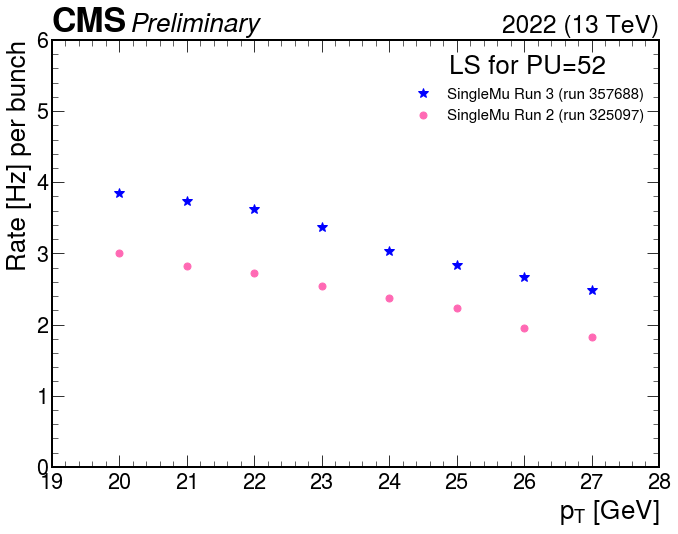

In [24]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_LS_Run3 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run3, '*', color="blue", markersize=10, label = "SingleMu Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleMu Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 28.)
plt.ylim(0., 6.)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
plt.tight_layout()
#plt.show()
plt.savefig('singleMu.pdf', dpi=1200)
plt.savefig('singleMu.png', dpi=1200)

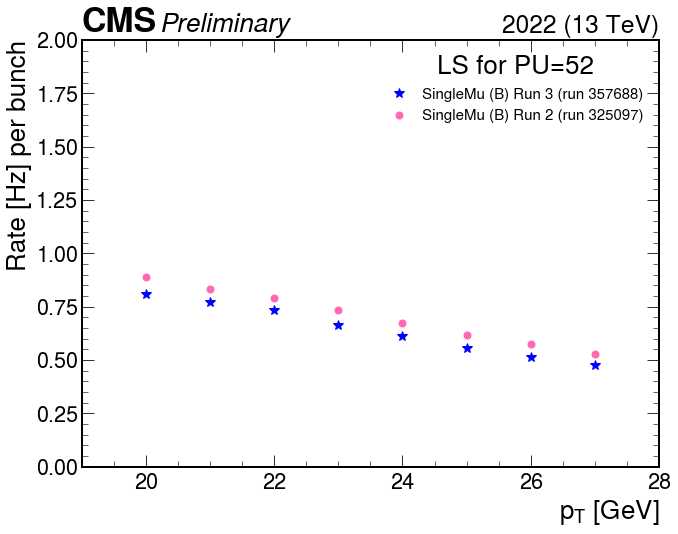

In [5]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_LS_Run3 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run3_B, '*', color="blue", markersize=10, label = "SingleMu (B) Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run2_B, '.', color="hotpink", markersize=14, label = "SingleMu (B) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 28.)
plt.ylim(0., 2.)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
plt.tight_layout()
#plt.show()
plt.savefig('singleMu_B.pdf', dpi=1200)
plt.savefig('singleMu_B.png', dpi=1200)

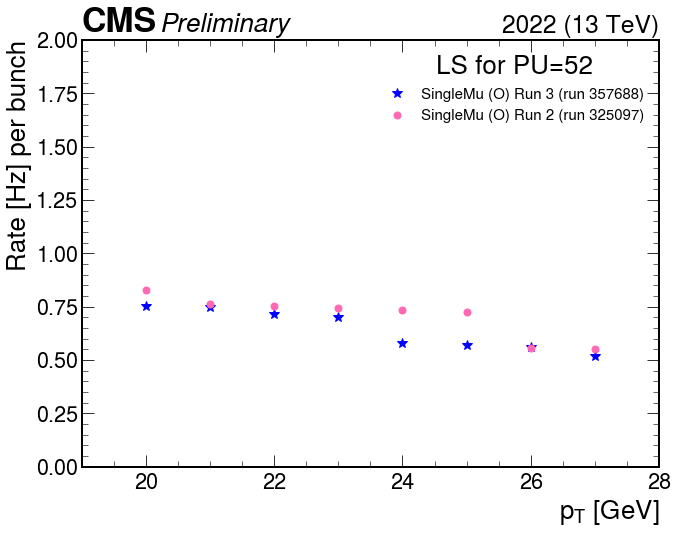

In [6]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_LS_Run3 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run3_O, '*', color="blue", markersize=10, label = "SingleMu (O) Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run2_O, '.', color="hotpink", markersize=14, label = "SingleMu (O) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 28.)
plt.ylim(0., 2.)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
plt.tight_layout()
#plt.show()
plt.savefig('singleMu_O.pdf', dpi=1200)
plt.savefig('singleMu_O.png', dpi=1200)

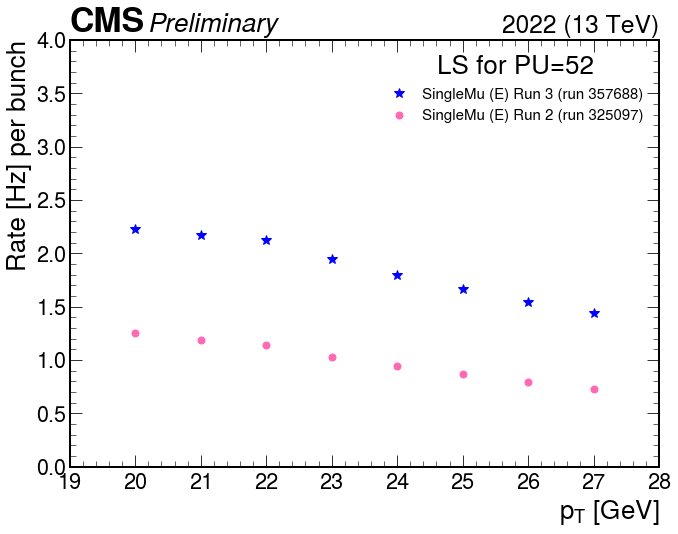

In [7]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_LS_Run3 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run3_E, '*', color="blue", markersize=10, label = "SingleMu (E) Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run2_E, '.', color="hotpink", markersize=14, label = "SingleMu (E) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 28.)
plt.ylim(0., 4.)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
plt.tight_layout()
#plt.show()
plt.savefig('singleMu_E.pdf', dpi=1200)
plt.savefig('singleMu_E.png', dpi=1200)

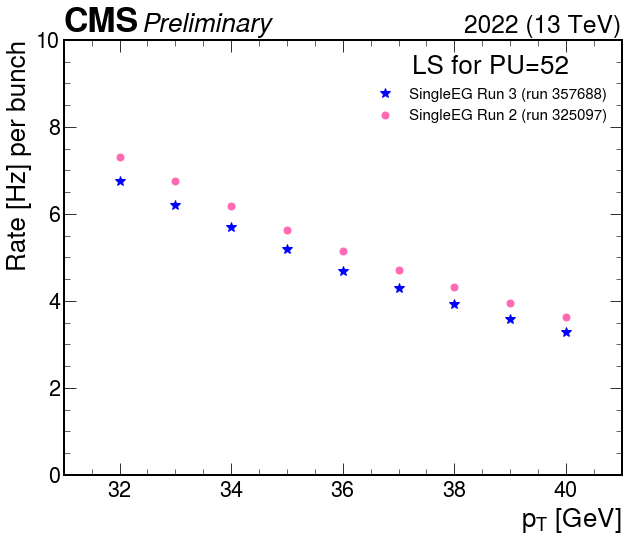

In [8]:
p_eg_LS_Run3, p_eg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_eg_LS_Run3 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run3, '*', color="blue", markersize=10, label = "SingleEG Run 3 (run 357688)")
p_eg_LS_Run2 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(31., 41.)
plt.ylim(0., 10.)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleEG.pdf', dpi=1200)
plt.savefig('singleEG.png', dpi=1200)

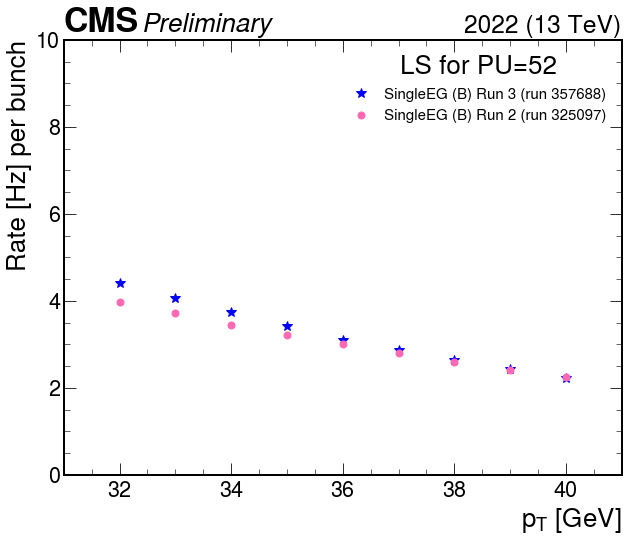

In [9]:
p_eg_LS_Run3, p_eg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_eg_LS_Run3 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run3_B, '*', color="blue", markersize=10, label = "SingleEG (B) Run 3 (run 357688)")
p_eg_LS_Run2 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run2_B, '.', color="hotpink", markersize=14, label = "SingleEG (B) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(31., 41.)
plt.ylim(0., 10.)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleEG_B.pdf', dpi=1200)
plt.savefig('singleEG_B.png', dpi=1200)

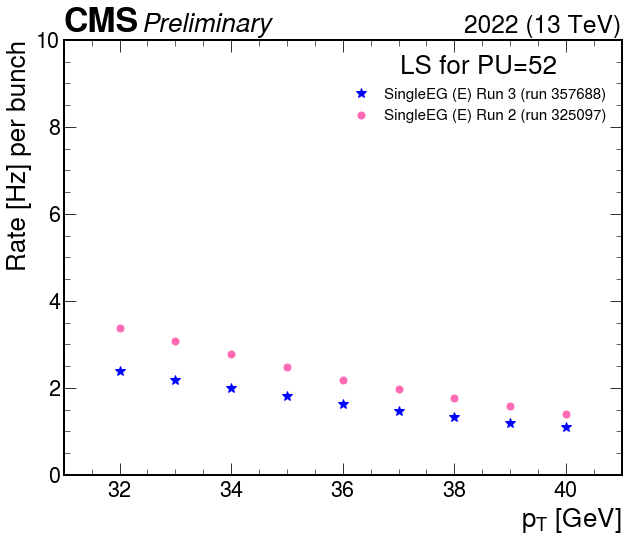

In [10]:
p_eg_LS_Run3, p_eg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_eg_LS_Run3 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run3_E, '*', color="blue", markersize=10, label = "SingleEG (E) Run 3 (run 357688)")
p_eg_LS_Run2 = plt.plot(eg_pt_thresholds, rate_eg_algo_Run2_E, '.', color="hotpink", markersize=14, label = "SingleEG (E) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(31., 41.)
plt.ylim(0., 10.)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleEG_E.pdf', dpi=1200)
plt.savefig('singleEG_E.png', dpi=1200)

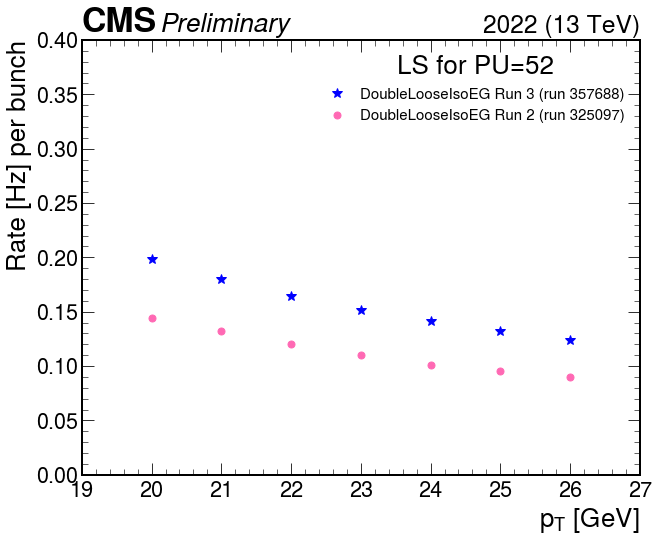

In [11]:
p_twoeg_LS_Run3, p_twoeg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twoeg_LS_Run3 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run3, '*', color="blue", markersize=10, label = "DoubleLooseIsoEG Run 3 (run 357688)")
p_twoeg_LS_Run2 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run2, '.', color="hotpink", markersize=14, label = "DoubleLooseIsoEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 27.)
plt.ylim(0., 0.4)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('doubleLooseIsoEG.pdf', dpi=1200)
plt.savefig('doubleLooseIsoEG.png', dpi=1200)

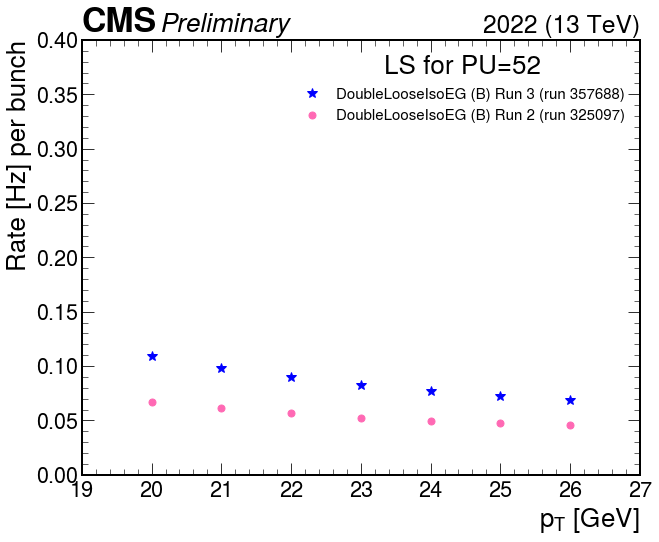

In [12]:
p_twoeg_LS_Run3, p_twoeg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twoeg_LS_Run3 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run3_B, '*', color="blue", markersize=10, label = "DoubleLooseIsoEG (B) Run 3 (run 357688)")
p_twoeg_LS_Run2 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run2_B, '.', color="hotpink", markersize=14, label = "DoubleLooseIsoEG (B) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 27.)
plt.ylim(0., 0.4)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('doubleLooseIsoEG_B.pdf', dpi=1200)
plt.savefig('doubleLooseIsoEG_B.png', dpi=1200)

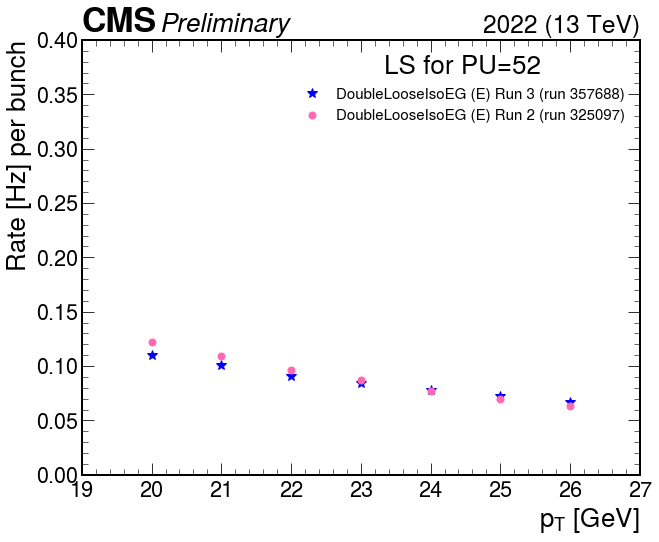

In [13]:
p_twoeg_LS_Run3, p_twoeg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twoeg_LS_Run3 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run3_E, '*', color="blue", markersize=10, label = "DoubleLooseIsoEG (E) Run 3 (run 357688)")
p_twoeg_LS_Run2 = plt.plot(doubleeg_pt_thresholds, rate_doubleeg_algo_Run2_E, '.', color="hotpink", markersize=14, label = "DoubleLooseIsoEG (E) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(19., 27.)
plt.ylim(0., 0.4)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('doubleLooseIsoEG_E.pdf', dpi=1200)
plt.savefig('doubleLooseIsoEG_E.png', dpi=1200)

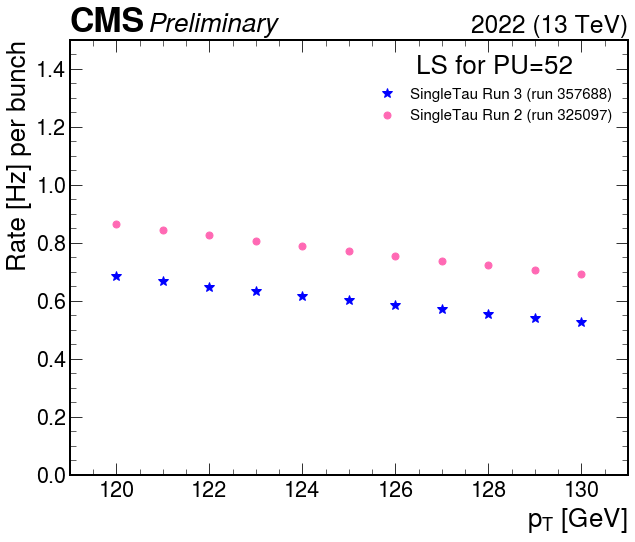

In [14]:
p_tau_LS_Run3, p_tau_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_tau_LS_Run3 = plt.plot(tau_pt_thresholds, rate_tau_algo_Run3, '*', color="blue", markersize=10, label = "SingleTau Run 3 (run 357688)")
p_tau_LS_Run2 = plt.plot(tau_pt_thresholds, rate_tau_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleTau Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(119., 131.)
plt.ylim(0., 1.5)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleTau.pdf', dpi=1200)
plt.savefig('singleTau.png', dpi=1200)

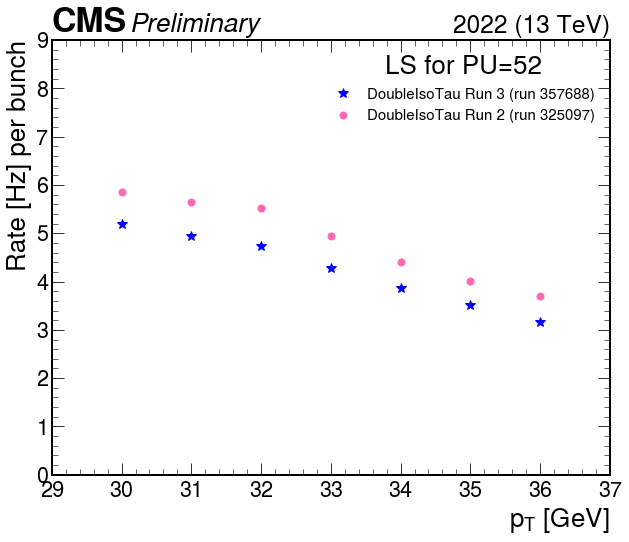

In [15]:
p_twotau_LS_Run3, p_twotau_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_twotau_LS_Run3 = plt.plot(doubleisotau_pt_thresholds, rate_doubleisotau_algo_Run3, '*', color="blue", markersize=10, label = "DoubleIsoTau Run 3 (run 357688)")
p_twotau_LS_Run2 = plt.plot(doubleisotau_pt_thresholds, rate_doubleisotau_algo_Run2, '.', color="hotpink", markersize=14, label = "DoubleIsoTau Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(29., 37.)
plt.ylim(0., 9.)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('doubleIsoTau.pdf', dpi=1200)
plt.savefig('doubleIsoTau.png', dpi=1200)

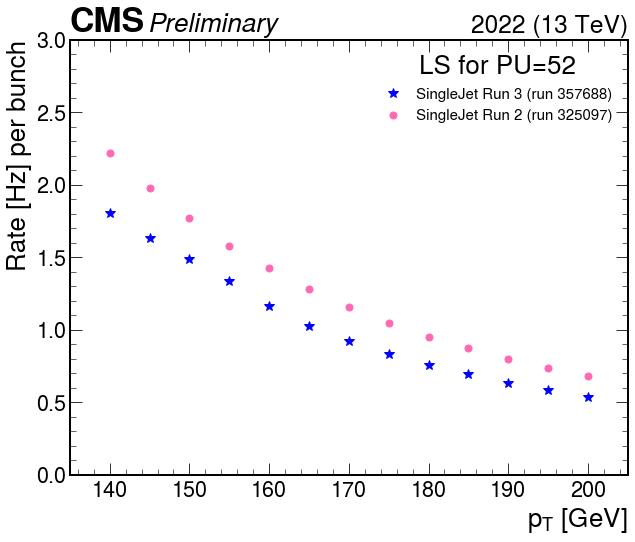

In [25]:
p_jet_LS_Run3, p_jet_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_jet_LS_Run3 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run3, '*', color="blue", markersize=10, label = "SingleJet Run 3 (run 357688)")
p_jet_LS_Run2 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleJet Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(135., 205.)
plt.ylim(0., 3)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleJet.pdf', dpi=1200)
plt.savefig('singleJet.png', dpi=1200)

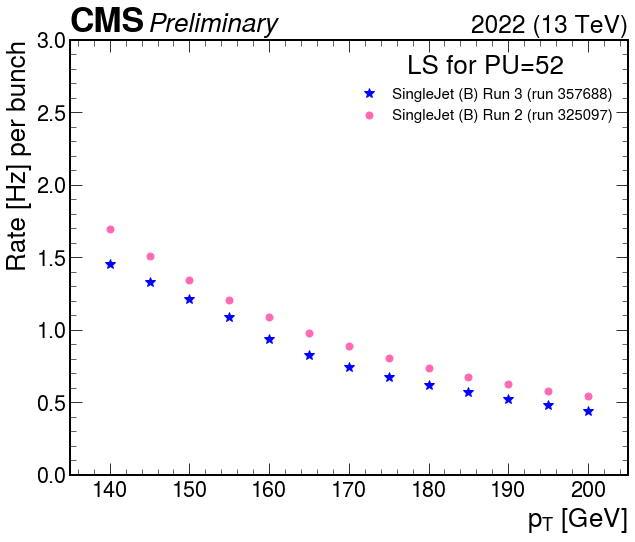

In [17]:
p_jet_LS_Run3, p_jet_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_jet_LS_Run3 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run3_B, '*', color="blue", markersize=10, label = "SingleJet (B) Run 3 (run 357688)")
p_jet_LS_Run2 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run2_B, '.', color="hotpink", markersize=14, label = "SingleJet (B) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(135., 205.)
plt.ylim(0., 3)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleJet_B.pdf', dpi=1200)
plt.savefig('singleJet_B.png', dpi=1200)

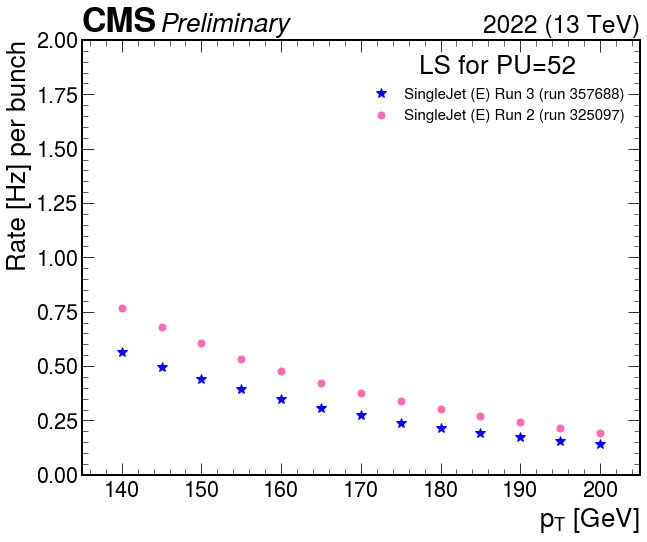

In [22]:
p_jet_LS_Run3, p_jet_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_jet_LS_Run3 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run3_E, '*', color="blue", markersize=10, label = "SingleJet (E) Run 3 (run 357688)")
p_jet_LS_Run2 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run2_E, '.', color="hotpink", markersize=14, label = "SingleJet (E) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(135., 205.)
plt.ylim(0., 2)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleJet_E.pdf', dpi=1200)
plt.savefig('singleJet_E.png', dpi=1200)

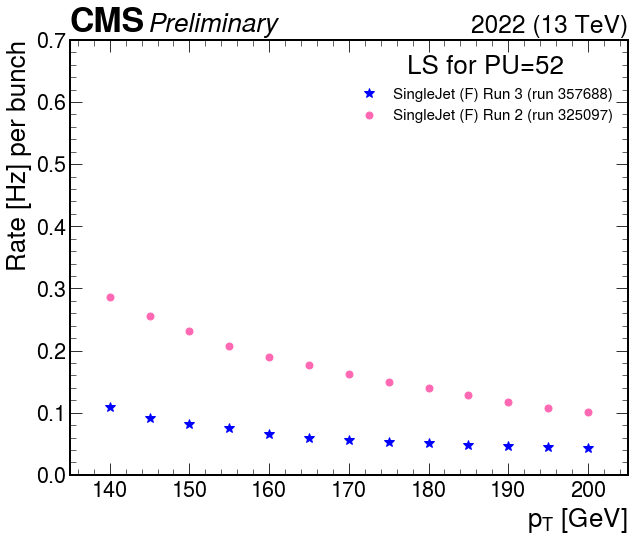

In [28]:
p_jet_LS_Run3, p_jet_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_jet_LS_Run3 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run3_F, '*', color="blue", markersize=10, label = "SingleJet (F) Run 3 (run 357688)")
p_jet_LS_Run2 = plt.plot(jet_pt_thresholds, rate_jet_algo_Run2_F, '.', color="hotpink", markersize=14, label = "SingleJet (F) Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(135., 205.)
plt.ylim(0., 0.7)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('singleJet_F.pdf', dpi=1200)
plt.savefig('singleJet_F.png', dpi=1200)

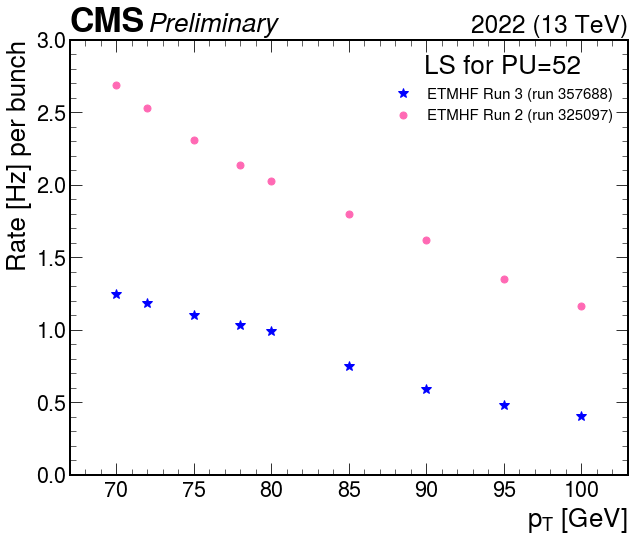

In [20]:
p_met_LS_Run3, p_met_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, year="2022")

p_met_LS_Run3 = plt.plot(met_thresholds, rate_met_algo_Run3, '*', color="blue", markersize=10, label = "ETMHF Run 3 (run 357688)")
p_met_LS_Run2 = plt.plot(met_thresholds, rate_met_algo_Run2, '.', color="hotpink", markersize=14, label = "ETMHF Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [Hz] per bunch')
plt.xlim(67., 103.)
plt.ylim(0., 3)
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
plt.savefig('ETMHF.pdf', dpi=1200)
plt.savefig('ETMHF.png', dpi=1200)